# The Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read Dataset

In [6]:
df = pd.read_csv('audi.csv')

# Dataset Description


In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<Axes: >

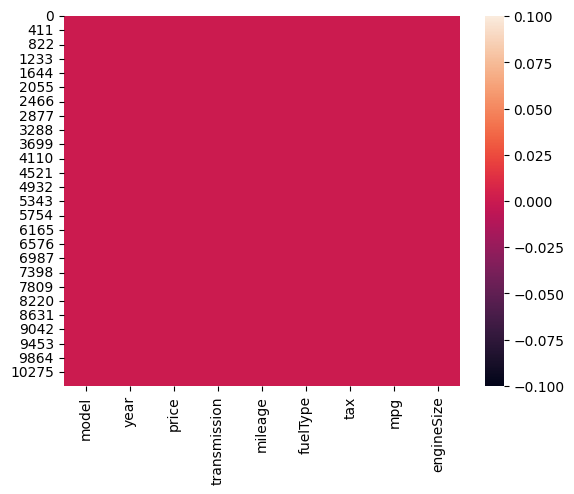

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Data Visualization

C:\Users\rezam\AppData\Local\Temp\ipykernel_5492\3629252972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

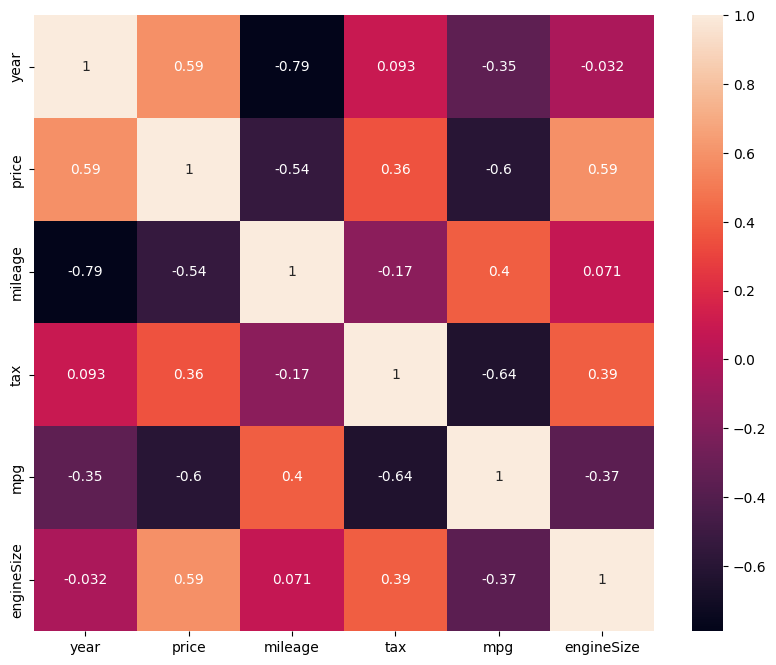

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Cars count by Model

In [12]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax':'Number of Cars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, ' A2'),
  Text(1, 0, ' RS7'),
  Text(2, 0, ' S5'),
  Text(3, 0, ' S8'),
  Text(4, 0, ' SQ7'),
  Text(5, 0, ' S4'),
  Text(6, 0, ' SQ5'),
  Text(7, 0, ' S3'),
  Text(8, 0, ' R8'),
  Text(9, 0, ' RS5'),
  Text(10, 0, ' RS4'),
  Text(11, 0, ' RS3'),
  Text(12, 0, ' RS6'),
  Text(13, 0, ' Q8'),
  Text(14, 0, ' A8'),
  Text(15, 0, ' A7'),
  Text(16, 0, ' TT'),
  Text(17, 0, ' Q7'),
  Text(18, 0, ' A6'),
  Text(19, 0, ' Q2'),
  Text(20, 0, ' Q5'),
  Text(21, 0, ' A5'),
  Text(22, 0, ' A1'),
  Text(23, 0, ' A4'),
  Text(24, 0, ' Q3'),
  Text(25, 0, ' A3')])

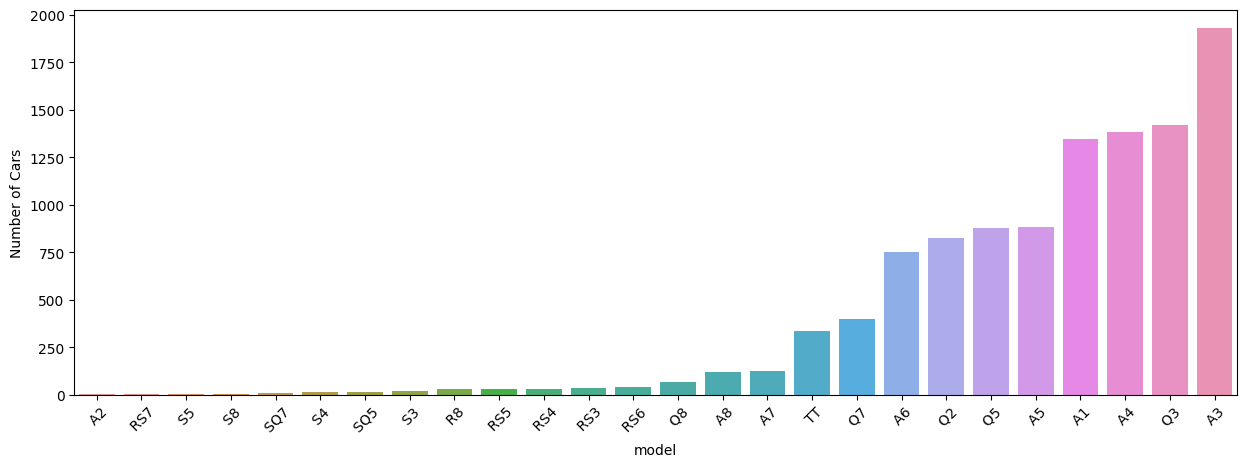

In [16]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x = models['model'], y = models['Number of Cars'])
plt.xticks(rotation=45)

# Cars count by Machine

In [18]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
engine = engine.rename(columns={'tax':'Count'})

<Axes: xlabel='engineSize', ylabel='Count'>

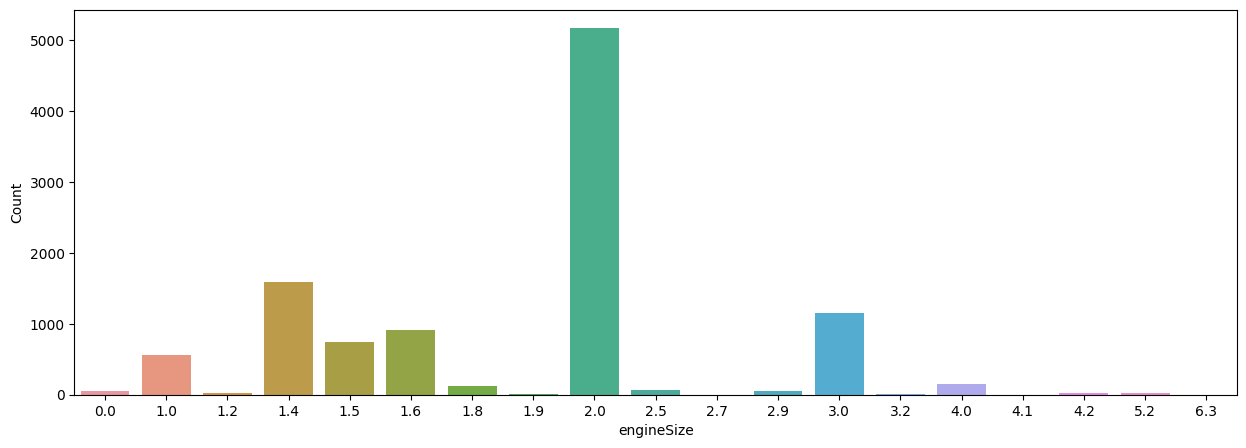

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x=engine['engineSize'], y=engine['Count'])

# Price Distribution

<Figure size 1500x500 with 0 Axes>

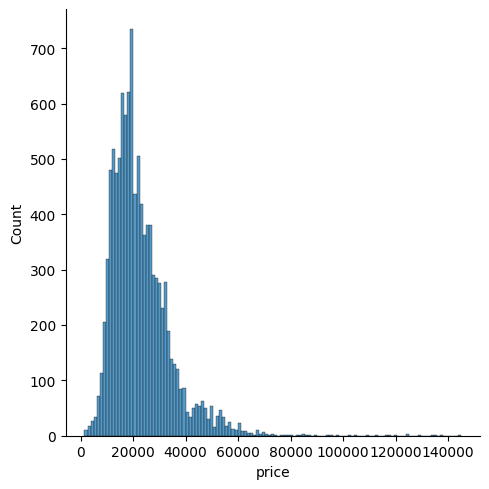

In [21]:
plt.figure(figsize=(15, 5))
sns.displot(df['price'])

# Selection Fitures

In [24]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10668, 5), (10668,))

# Split Training Data n Testing data

In [25]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(x, y, random_state=70)
Y_test.shape

(2667,)

# Create Model Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(X_test)

In [27]:
score = lr.score(X_test, Y_test)
print('Akurasi model linear regresi = ', score)

Akurasi model linear regresi =  0.7594637694494424


# Create Input Model Linear Regression

In [31]:
# parameter(year, mileage, tax, mpg, engineSize)
input_data = np.array([[2019, 5000, 145, 30.2, 2]])

predicts = lr.predict(input_data)
print('Estimasi harga mobil ', predicts)

Estimasi harga mobil  [33720.47965492]


C:\Users\rezam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Import Pickle

In [ ]:
import pickle

filename = 'estimate_cars.sav'
pickle.dump(lr, open(filename, 'wb'))